<a href="https://colab.research.google.com/github/caiolgomes/EDA-Texas-animal-shelter-data-base/blob/main/Forecasting_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting Time Series using Prophet

### In this project I'll be making an exploratory data analysis and forecast of an animal shelter database. Before diving into the project, lets get to know prophet and why it's a powerfull forecasting tool.

## Prophet and timeSeries

Making good predictions with temporal data is a highly complex task. Given the complexity of the statiscal models, Time series are a challenge for machine learning enginers economists and statisticians.

Trying to implement a model without using any framework, implies deeply understanding a theory that is not trivial and that requires a certain degree of specialization.

Prophet is a forecasting framework  for time series, made available as an open source project by Facebook. Implemented in Python and R, it is capable of making automated and fast predictions.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/prophet.png" height="300px"></p>

Since not all * time series * problems can be solved in the same way - and Prophet was developed with Facebook's internal problems in mind - it's possible for scientists and data analysts to optimize parameters

To access the official project documentation, just [access this page.] (Https://facebook.github.io/prophet/). Although there are not many projects and tutorials, it is recommended to know the possible customizations of the model.


### Prophet predictive model

As we said earlier, Prophet is designed to solve Facebook problems. That is, it is very strong to deal with problems that have characteristics such as:

*Data collected over a long period (months or years), and which have the greatest possible historical detail.

* Strong and prominent seasonality.

* Known holidays or special dates

* Non-linear growth trend, which is approaching a limit.

Propeht uses a decomposed time series model, with three main components: trend, seasonality and holidays:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

where:

* $g(t)$ it is the trend, which models non-periodic changes in the value of the time series;

* $s(t)$ represents periodic changes (such as weekly, annual, etc.);

* $h(t)$ represents the effect of holidays and special dates.
* $\varepsilon_t$ it is the error, the changes that are not captured by the model (this is assumed to have a normal distribution).






## The Problem of an animal shelter

The Austin, Texas Animal Center provides shelter for more than 16,000 animals a year, in addition to other services involving animal protection - regardless of their breed, age or health status.

Having as the main goal "to allocate all possible animals to a new home, either through adoption, social assistance or rescue groups.

Despite this objective, it is not possible to find a home for all these animals, and many end up being euthanized. The Austin Animal Center's goal is to ensure that the positive outcome, that is, the livelihood of these animals, exceeds 90% of the total.
here for a new home, whether through adoption, social assistance or rescue groups.

In this project, we will analyze the livelihoods of these animals. With this analysis, we are expected to be able to identify an adoption pattern.

More than identifying a pattern, it is expected to make future predictions in relation to the number of outgoing Austin Animal Center, aiming at:

1. Plan input purchases (medicines, food, etc.);
2. Hiring of employees and collaborators; 
3. Carry out campaigns to optimize the adoption of animals.


### Data acquisition

The data was made available by the [Austin Animal Center] (http://www.austintexas.gov/content/austin-animal-center) and can be downloaded directly from the [City of Austin Open Data Portal] (https: // data. austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238).

In [ ]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
#importing data Into a data frame
df = pd.read_csv("https://github.com/carlosfab/escola-data-science/blob/master/datasets/shelter_animal_outcomes.csv?raw=true")
df.DateTime = pd.to_datetime(df.DateTime)
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,2016-02-13 17:59:00,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,2014-03-18 11:47:00,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,2014-10-18 18:52:00,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [ ]:
#converting date to date format
df.DateTime = pd.to_datetime(df.DateTime)

#exploraty analysis

In [ ]:
#checking for missing values
df.isnull().sum()

Animal ID               0
Name                36817
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type            8
Outcome Subtype     64169
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       47
Breed                   0
Color                   0
dtype: int64

#Possible Outcomes

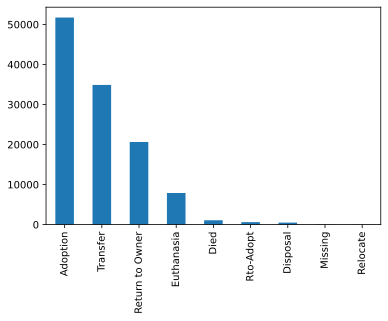

In [ ]:
#Checking the possible outcomes
df['Outcome Type'].value_counts().plot.bar()

## Looking into the mortality rates, we can see that the Austin animal shelter is keeping up with the goal of 90% livelihood

In [ ]:
#the possible outcomes as a percentage of all animals
df['Outcome Type'].value_counts() / df.shape[0]

Adoption           0.440502
Transfer           0.297166
Return to Owner    0.175751
Euthanasia         0.067197
Died               0.009155
Rto-Adopt          0.005204
Disposal           0.004216
Missing            0.000571
Relocate           0.000170
Name: Outcome Type, dtype: float64

In [ ]:
df_animals = df['Animal Type'].value_counts()

##Plotting the number of animals by especies (all-time)

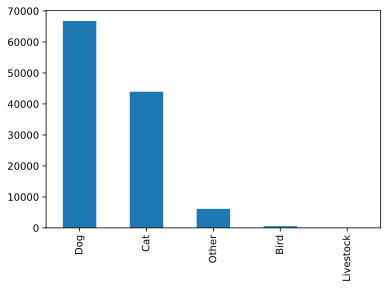

In [ ]:
df_animals.plot.bar()

### Wich Breeds of dogs are most commonn in the shelter?

In [ ]:
from google.colab import files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

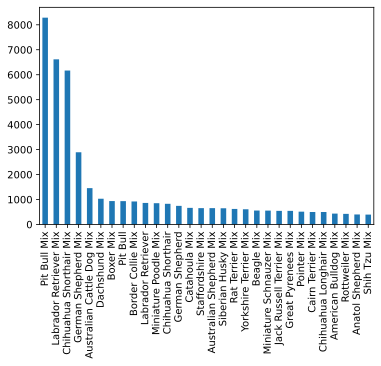

In [ ]:
fig_breed = df[df['Animal Type']=='Dog'].Breed.fillna('Unknown').value_counts().head(30).plot(kind='bar')
fig_breed


### Cat Breeds

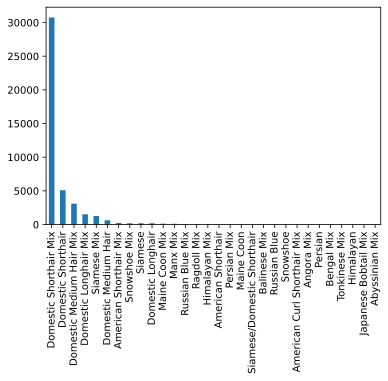

In [ ]:
df[df['Animal Type']=='Cat'].Breed.fillna('Unknown').value_counts().head(30).plot(kind='bar')

### Looking at pure breed animals x mix

In [ ]:
# We consider a breed 'pure' if the breed name does not contain "Mix"
df['PureBred'] = ~df.Breed.str.contains('Mix', regex=False)
df.PureBred.value_counts()

False    89196
True     28220
Name: PureBred, dtype: int64

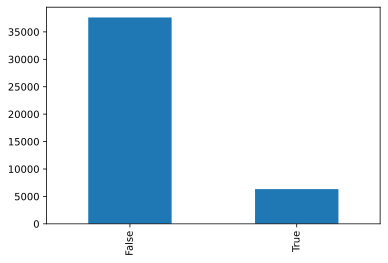

In [ ]:
df[df['Animal Type'] == 'Cat'].PureBred.value_counts().plot(kind='bar')

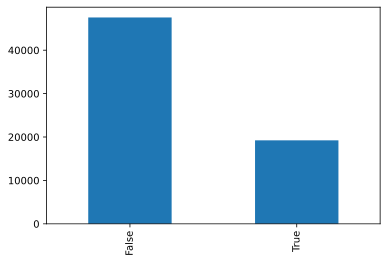

In [ ]:
df[df['Animal Type'] == 'Dog'].PureBred.value_counts().plot(kind='bar')

# converting the string dates into numeric values

In [ ]:
from datetime import timedelta


In [ ]:
max_int = 20
time_map = {f'{n} {word}': n*delta
            for n in range(max_int+1)
            for word, delta in [
                ('day', timedelta(days=1)),
                ('days', timedelta(days=1)),
                ('week', timedelta(weeks=1)),
                ('weeks', timedelta(weeks=1)),
                ('month', timedelta(days=30)), # close enough
                ('months', timedelta(days=30)), # close enough
                ('year', timedelta(days=365)), # close enough
                ('years', timedelta(days=365)) # close enough
            ]}
time_map[np.nan] = None
time_map

{'0 day': datetime.timedelta(0),
 '0 days': datetime.timedelta(0),
 '0 month': datetime.timedelta(0),
 '0 months': datetime.timedelta(0),
 '0 week': datetime.timedelta(0),
 '0 weeks': datetime.timedelta(0),
 '0 year': datetime.timedelta(0),
 '0 years': datetime.timedelta(0),
 '1 day': datetime.timedelta(days=1),
 '1 days': datetime.timedelta(days=1),
 '1 month': datetime.timedelta(days=30),
 '1 months': datetime.timedelta(days=30),
 '1 week': datetime.timedelta(days=7),
 '1 weeks': datetime.timedelta(days=7),
 '1 year': datetime.timedelta(days=365),
 '1 years': datetime.timedelta(days=365),
 '10 day': datetime.timedelta(days=10),
 '10 days': datetime.timedelta(days=10),
 '10 month': datetime.timedelta(days=300),
 '10 months': datetime.timedelta(days=300),
 '10 week': datetime.timedelta(days=70),
 '10 weeks': datetime.timedelta(days=70),
 '10 year': datetime.timedelta(days=3650),
 '10 years': datetime.timedelta(days=3650),
 '11 day': datetime.timedelta(days=11),
 '11 days': datetime.tim

In [ ]:
df['AgeInDays'] = df['Age upon Outcome'].map(time_map).map(lambda age: age.days)

##Histogram age upon outcome * In days *

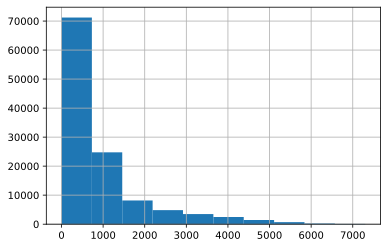

In [ ]:
df['AgeInDays'].hist()

In [ ]:
df[['Outcome Type', 'AgeInDays']].groupby('Outcome Type').agg(['mean', 'median'])

AgeInDays        
                        mean  median
Outcome Type                        
Adoption          603.791443   300.0
Died              528.354419    60.0
Disposal          494.296970   365.0
Euthanasia        898.016191   365.0
Missing           568.179104   365.0
Relocate          608.650000   195.0
Return to Owner  1432.834165  1095.0
Rto-Adopt        1252.911475   730.0
Transfer          587.352307   300.0

## Histogram of dogs that have died in the shelter

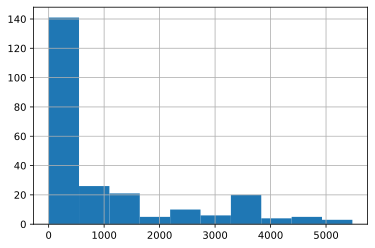

In [ ]:
df[(df['Animal Type']=='Dog') & (df['Outcome Type'] == 'Died')].AgeInDays.hist()

## The vast majority of dogs that are euthanasied are still young!

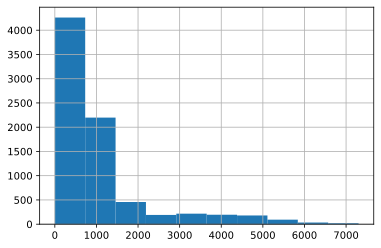

In [ ]:
df[df['Outcome Type'] == 'Euthanasia'].AgeInDays.hist()

## We can see that the biggest factor of euthanasied animals is the spread of the rabies virus, wich has no treatment and it's highly infective

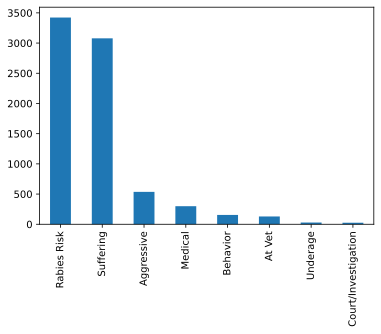

In [ ]:
df[df['Outcome Type'] == 'Euthanasia']['Outcome Subtype'].value_counts().plot(kind='bar')

In [ ]:
print(df[df['Outcome Subtype'] == 'Rabies Risk'])

       Animal ID Name            DateTime  ...        Color PureBred AgeInDays
20       A766700  NaN 2018-02-15 08:59:00  ...        Brown    False     365.0
25       A765701  NaN 2018-01-25 09:39:00  ...        Brown    False     365.0
32       A730464  NaN 2016-07-05 12:47:00  ...  Black/Brown     True     365.0
43       A757815  NaN 2017-09-07 11:00:00  ...   Gray/Black     True     730.0
60       A734055  NaN 2016-09-01 08:05:00  ...        Brown    False     365.0
...          ...  ...                 ...  ...          ...      ...       ...
117396   A816828  NaN 2020-04-30 08:08:00  ...  Black/White     True     730.0
117400   A816834  NaN 2020-04-30 08:10:00  ...        Brown     True     365.0
117403   A816850  NaN 2020-04-30 12:12:00  ...        Brown     True       NaN
117404   A816851  NaN 2020-04-30 12:13:00  ...        Brown     True       NaN
117408   A816857  NaN 2020-04-30 15:10:00  ...        Brown     True       NaN

[3423 rows x 14 columns]


## The gorup of animals that are returned to their owners are slightly older than the population of the dataset

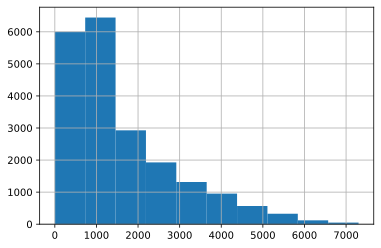

In [ ]:
df[df['Outcome Type'] == 'Return to Owner'].AgeInDays.hist()

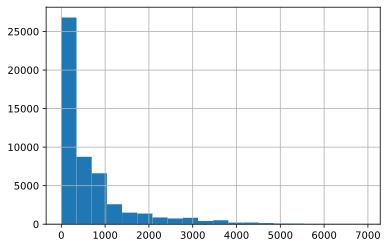

In [ ]:
df[df['Outcome Type'] == 'Adoption'].AgeInDays.hist(bins=20)

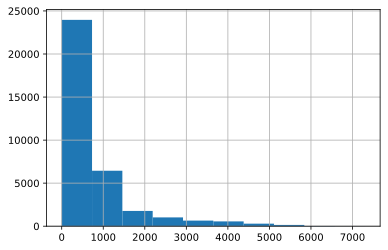

In [ ]:
df[df['Outcome Type'] == 'Transfer'].AgeInDays.hist()

# Some conclusions...

##The age problem.

We can see based on the adoption histogram that when the animals reach approximately 1.5 years the chance of adoption drops more than 60%. The shelter could run a program to incentivise the adoption of older dogs. Dr. Mary Mauldin Pereira, a veterinarian and professor at the Ross University School of Veterinary Medicine told on an interview about the problem. "It takes a special person to adopt a senior dog, but there are many benefits to it." Such as a more pacific behvior, avoiding possible size problems and the joy of the animal.

## The virus Problem

altough a big portion of the euthanasied animals are suffering, we can see that the biggest factor is the rabies virus. According to the Texas department of state health services the canine variant of the virus hasn't been a problem since 2004. 
"A canine rabies epizootic (an epidemic in animals) began in 1988 and
ultimately involved 21 counties in South Texas. Statewide there were no
reported cases with the domestic dog/coyote (DDC) variant of the rabies
virus in 2019. The last reported case with the DDC rabies virus variant was
in March 2004."

that statement does not match the data from the animal shelter, therefore it is a topic worth to take a deeper look at it.


#Now Let's dive into forecasting in order to better prepare ourselves for the near future.

In [ ]:
#Creating a new data frame with values for animals that werer either adopted or returned to the owner
adoptions_df = df[(df['Outcome Type'] == 'Adoption') | (df['Outcome Type'] == 'Return to Owner')]
adoptions_df['outcomeCount'] = 1
adoptions_df = adoptions_df[['DateTime', 'outcomeCount']]
adoptions_df = adoptions_df.set_index('DateTime').sort_index()
adoptions_df.head()

,outcomeCount
DateTime,
2013-10-01 09:31:00,1
2013-10-01 11:03:00,1
2013-10-01 11:42:00,1
2013-10-01 11:50:00,1
2013-10-01 11:53:00,1


In [ ]:
adoptions_df.index.min(), adoptions_df.index.max()

(Timestamp('2013-10-01 09:31:00'), Timestamp('2020-04-30 16:37:00'))

# We can see a drop on the adoptions with the start of the pandemic.

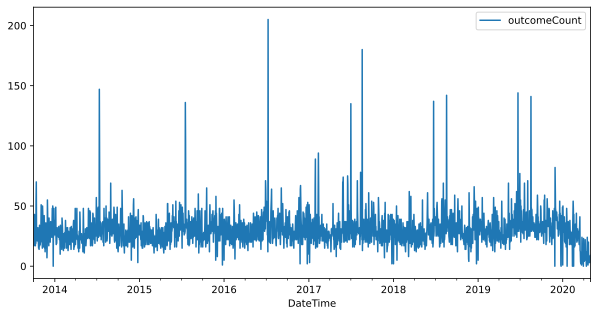

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('D').sum().plot(ax=ax)
plt.show()

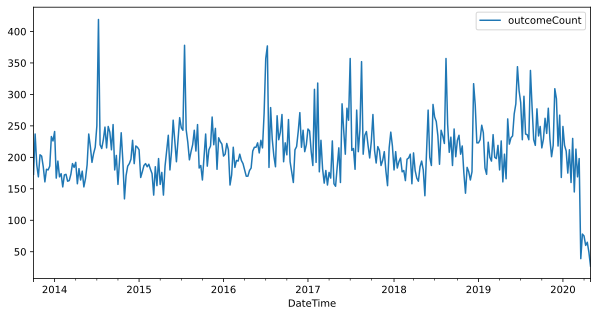

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('W').sum().plot(ax=ax)
plt.show()

In [ ]:
import matplotlib.dates as mdates

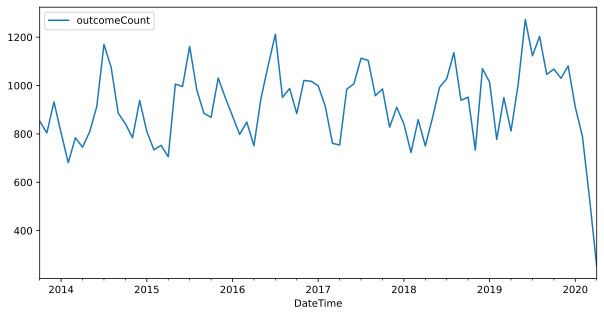

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('M').sum().plot(ax=ax)


plt.show()

#Preparing data for prophet

prophet works using two columns, one being the time and the other one the independent variable

In [ ]:
prophet_df = adoptions_df.resample('D').sum().reset_index().rename(columns={'DateTime' : 'ds', 'outcomeCount' : 'y'})
prophet_df.head()

,ds,y
0,2013-10-01,24
1,2013-10-02,27
2,2013-10-03,17
3,2013-10-04,20
4,2013-10-05,43


In [ ]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(prophet_df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

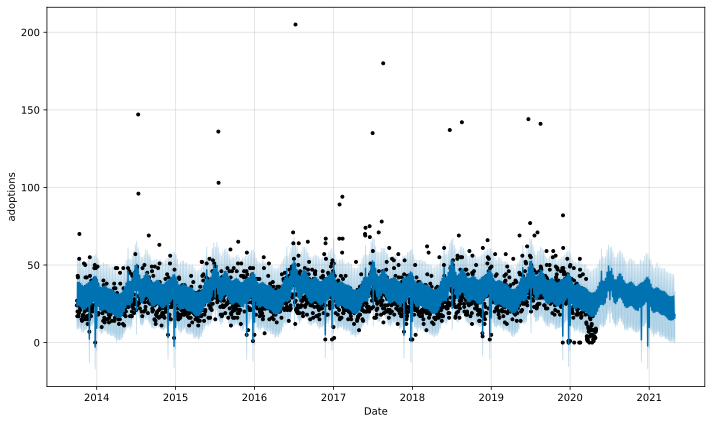

In [ ]:
model1_fig = model.plot(forecast, xlabel = 'Date', ylabel = 'adoptions');
model1_fig
plt.savefig('model1_fig.svg')
files.download('model1_fig.svg')

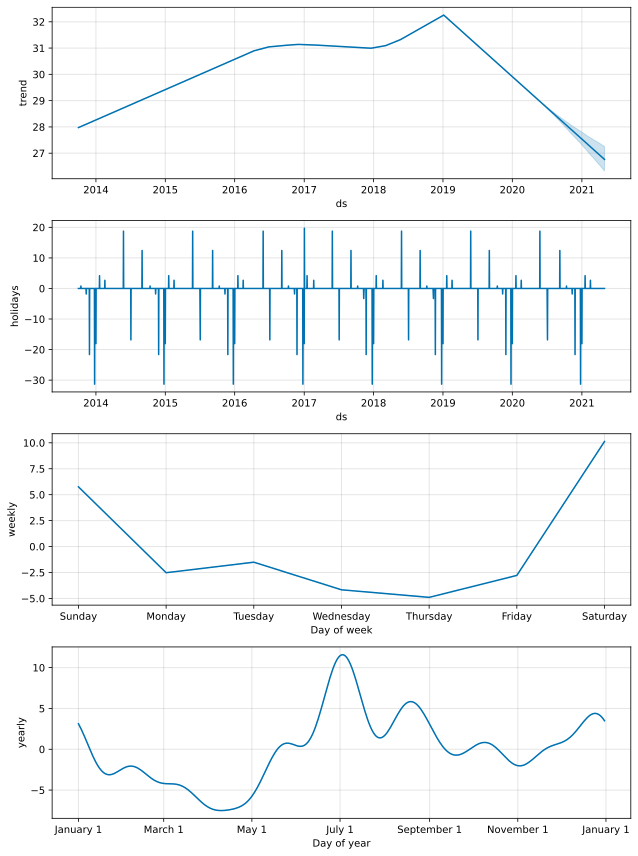

In [ ]:
model.plot_components(forecast);

#Weekly model

In [ ]:
prophet_df2 = adoptions_df.resample('W').sum().reset_index().rename(columns={'DateTime' : 'ds', 'outcomeCount' : 'y'})
model2 = Prophet()
model2.add_country_holidays(country_name='US')
model2.fit(prophet_df2)
#Setting the period of forecast
future2 = model2.make_future_dataframe(periods=365)
#prediciting
forecast2 = model2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#The weekly model is the best approach to this situation, given that we have more consitency when dealing with moving averages.

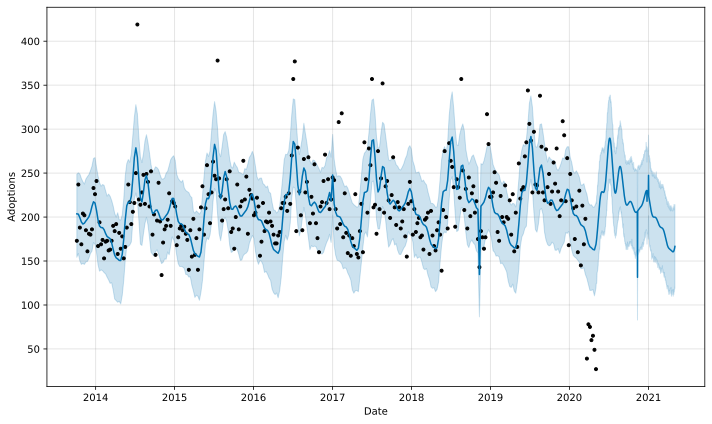

In [ ]:
model2.plot(forecast2, xlabel='Date', ylabel='Adoptions');

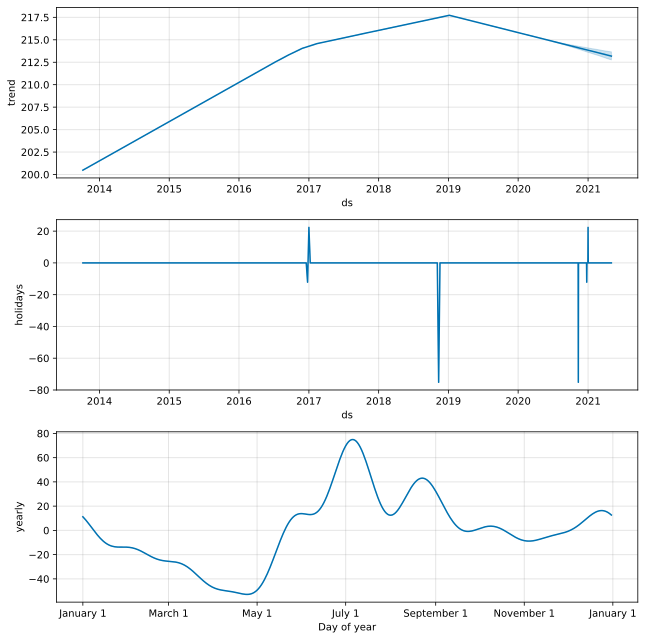

In [ ]:
model2.plot_components(forecast2);

#evaluating the models

###Daily model

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-10-30 12:00:00 and 2019-05-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-31,26.000545,13.905492,38.493818,25,2016-10-30 12:00:00
1,2016-11-01,26.060567,13.810134,38.610469,25,2016-10-30 12:00:00
2,2016-11-02,23.774319,10.883552,36.231695,22,2016-10-30 12:00:00
3,2016-11-03,23.332210,10.270220,35.124931,30,2016-10-30 12:00:00
4,2016-11-04,24.461175,12.019378,37.630565,35,2016-10-30 12:00:00


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,36 days 12:00:00,114.648659,10.707411,8.086901,0.229097,0.812785
1,37 days 00:00:00,114.739578,10.711656,8.106896,0.229097,0.812785
2,37 days 12:00:00,116.887842,10.811468,8.242880,0.233703,0.808219
3,38 days 00:00:00,116.370228,10.787503,8.216152,0.233703,0.808219
4,38 days 12:00:00,116.185085,10.778919,8.201187,0.233651,0.808219


##In this plot we can see that the model fits well throughout the year, the lack of accuracy in the more recent values can be credit to the external event CORONA VIRUS

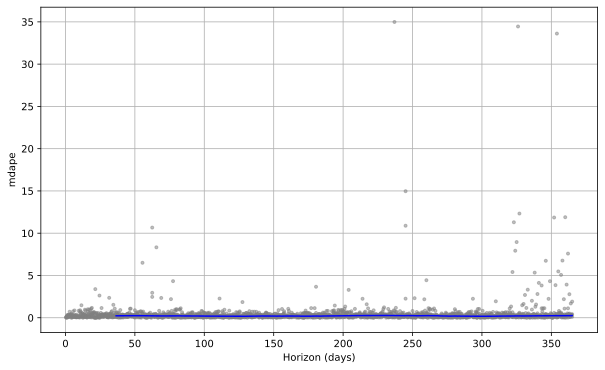

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mdape')

### Weekly Model

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-11-02 12:00:00 and 2019-05-04 00:00:00



           horizon          mse       rmse  ...      mape     mdape  coverage
0 36 days 00:00:00  1331.969744  36.496161  ...  0.151996  0.129990  0.709677
1 36 days 12:00:00  1345.257050  36.677746  ...  0.153226  0.131294  0.709677
2 37 days 00:00:00  1346.367225  36.692877  ...  0.152815  0.129990  0.709677
3 37 days 12:00:00  1502.099124  38.756924  ...  0.166141  0.152313  0.677419
4 38 days 00:00:00  1516.769065  38.945719  ...  0.169153  0.152313  0.677419

[5 rows x 7 columns] 



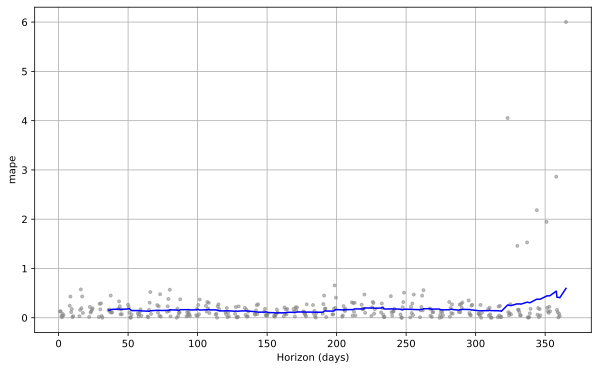

In [ ]:
df_cv2 = cross_validation(model2, horizon = '365 days')


df_p2 = performance_metrics(df_cv2)
print(df_p2.head(), "\n")

plot_cross_validation_metric(df_cv2, metric='mape');

#Forecasting conclusions

As expected the weekly model has shown us a better result than tha daily model, we've reached a mdape value of about 13%. there's still lots of room for improvement but given the totally unexpected event of the pandemic, the model is well fitted.

##Performance metrics
I chose the Media Absolute percent error (MdAPE) as the model performance metric, because it works with the median value instead of the mean. Therefore it is more reliable when we have some outliers that pull our mean into extremes.
reference:
https://forvis.github.io/our-publications/6.pdf

## Where can this Help?

With forecasting, we can better prepare ourselves for the future. Decisions such as employee hiring, resources planing and other important issues can be decided with a data driven approach and therefore more assertive decisions may come to your institution. We can see the pattern in the adoptions, they peak in july and in sepetember and hit bottom in may, probably because of the wheather, the downwards trend matches the start of the winter e the peaks match the start of summer.

## Prophet as a tool

Prophet is a very powerfull forecasting tool, easy to use and it suports custom holidays options wich can be added to the model in oreder to fit the needs of your analysis. Altough time series is a complex topic I think this tool can make it simpler if used properly.